<h1>HABERMAN CANCER DATA SET ANALYSIS & PREDICTION MODEL</h1>

<h3>DATA SET DETAILS</h3>
<p>Number of Instances: 306<br>

Number of Attributes: 4<br>

Attribute Information:<br>

1. Age of patient at time of operation (numerical)<br>
2. Patient's year of operation (year - 1900, numerical)<br>
3. Number of positive axillary nodes detected (numerical)<br>
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year</p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("haberman.csv",names=['Age','Year','AN','SurvivalStatus'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
Year              306 non-null int64
AN                306 non-null int64
SurvivalStatus    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


,Age,Year,AN,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.shape

(306, 4)

In [4]:
df[pd.isnull(df['Age'])]

,Age,Year,AN,SurvivalStatus


In [5]:
df.describe()

,Age,Year,AN,SurvivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
#two classes for survival status
#1 for person survived
#2 for person died after surgery
df['SurvivalStatus'].value_counts()

1    225
2     81
Name: SurvivalStatus, dtype: int64

In [7]:
#function for dense plot
def dens_plot(features,class_var):
    #adding the white grid style 
    sns.set_style(style="whitegrid")
    #adding datapoint colour and size
    sns.FacetGrid(data=df, hue=class_var,size=7).map(sns.distplot,features).add_legend()

C:\Users\91873\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


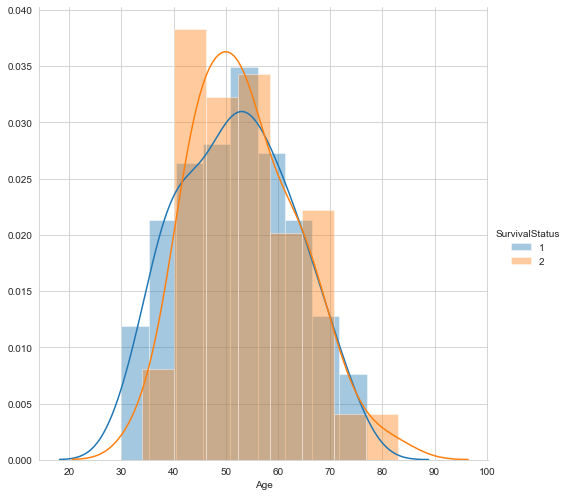

In [8]:
dens_plot("Age","SurvivalStatus")
plt.show()

Conclusion :<br>1 This histogram is overlapping each other.<br>2 It is seen that people within range of 40-60 are more likely to die.<br>3 People less than age 40 are more likely to survive.

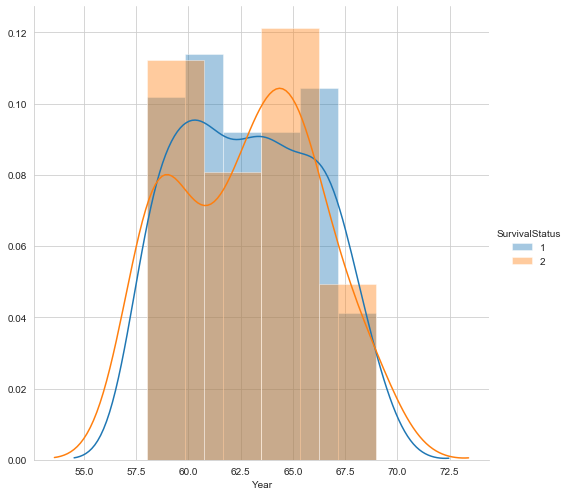

In [9]:
dens_plot("Year","SurvivalStatus")
plt.show()

Conclusion :<br>1 The plot represents the immense overlapping of respective two classes.<br>2 It is clearly seen that the patients whose operation was done in between 57.5 to 60 and 62.5 to 65 died.

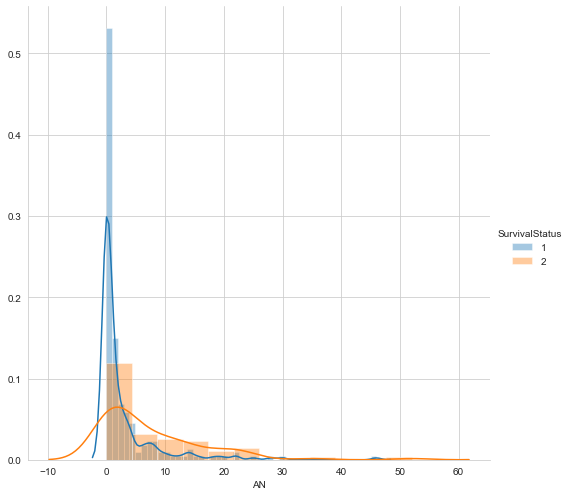

In [10]:
dens_plot("AN","SurvivalStatus")
plt.show()

Conclusion :<br>1 Partially overlapping among the classes observed.<br>2 It is clearly visible that the patients having 0 axil nodes will survive.

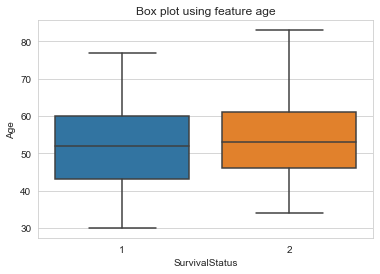

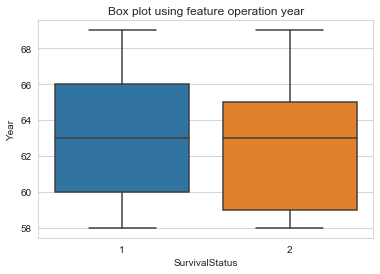

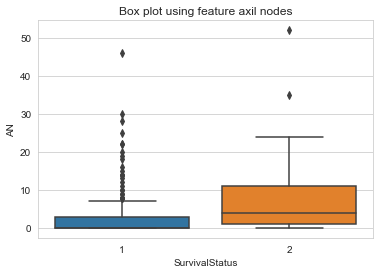

In [11]:
#Box Plot for the feature Age
sns.boxplot(x='SurvivalStatus',y = 'Age', data = df)
plt.title("Box plot using feature age")
plt.show()

#Box Plot for the feature Year of Operations
sns.boxplot(x = 'SurvivalStatus', y = 'Year', data = df)
plt.title("Box plot using feature operation year")
plt.show()

#Box Plot for the feature axillary nodes
sns.boxplot(x = 'SurvivalStatus', y ='AN', data = df)
plt.title("Box plot using feature axil nodes")
plt.show()

Conclusion: <br>1 It is clear that almost 95% of data points are overlapping with almost same median. Hence, age feature is not sufficient to find out the exact scenario.<br>2 It is clear that almost 80% of data points are overlapping with almost same median. Hence, operation year feature is not sufficient to find out the exact scenario.<br>3 It is observed that box plot of class_1 have outliers and also visible that around 50% of patients have axil nodes less than or equal to 3.

In [12]:
#function for scatterplot
def scatter_plot(cv1,cv2):
    sns.set_style("whitegrid")
    sns.FacetGrid(df,hue="SurvivalStatus",height=6).map(plt.scatter,cv1,cv2).add_legend()


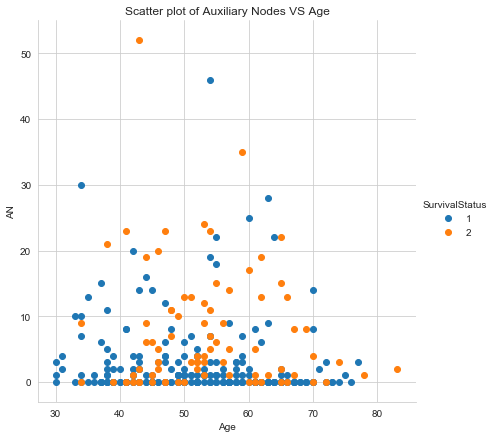

In [13]:
#Age vs AN
scatter_plot("Age","AN")
plt.title("Scatter plot of Auxiliary Nodes VS Age")
plt.show()

Conclusion: There is an overlap of around 80%-85%. So we can't classify survival of patients on the basis of axil_nodes and Age.


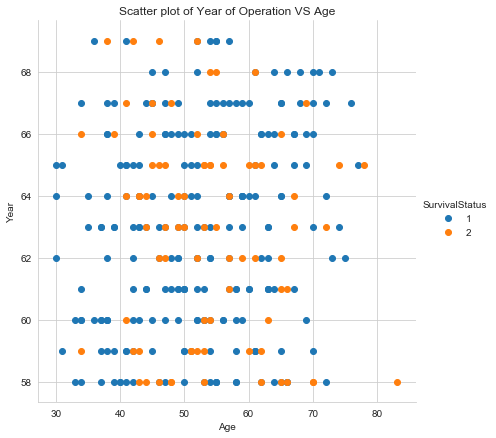

In [14]:
#Age vs Year
scatter_plot("Age","Year")
plt.title("Scatter plot of Year of Operation VS Age")
plt.show()

Conclusion: There is an overlap of around 85%-90% . So we can't classify survival of patients on the basis of Age and Operation_Year.

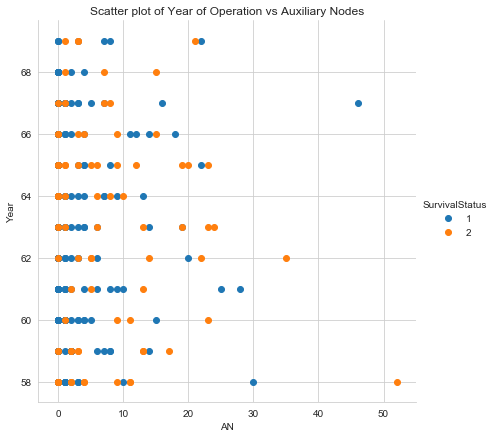

In [15]:
#AN vs Age
scatter_plot("AN","Year")
plt.title("Scatter plot of Year of Operation vs Auxiliary Nodes")
plt.show()

Conclusion: There is an overlap of around 90%-95% . So , it is very difficult to classify the survival of patients who had undergone breast surgery on the basis of Operation_Year and axil_nodes.

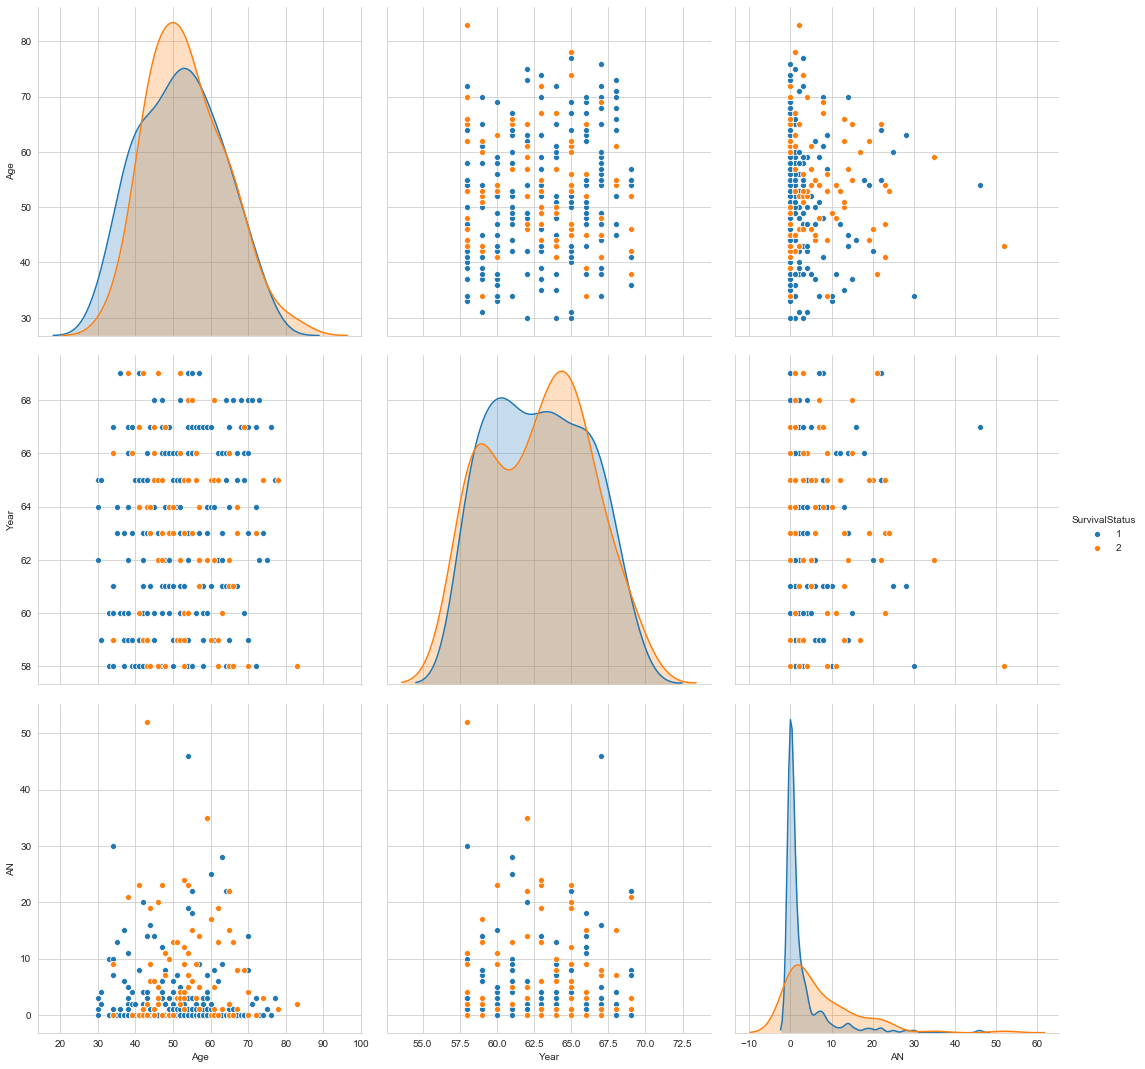

In [16]:
#pairplot on Haberman dataset
sns.set_style("whitegrid")
sns.pairplot(df,hue="SurvivalStatus", vars=["Age","Year","AN"], height=5)
plt.show()

C:\Users\91873\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


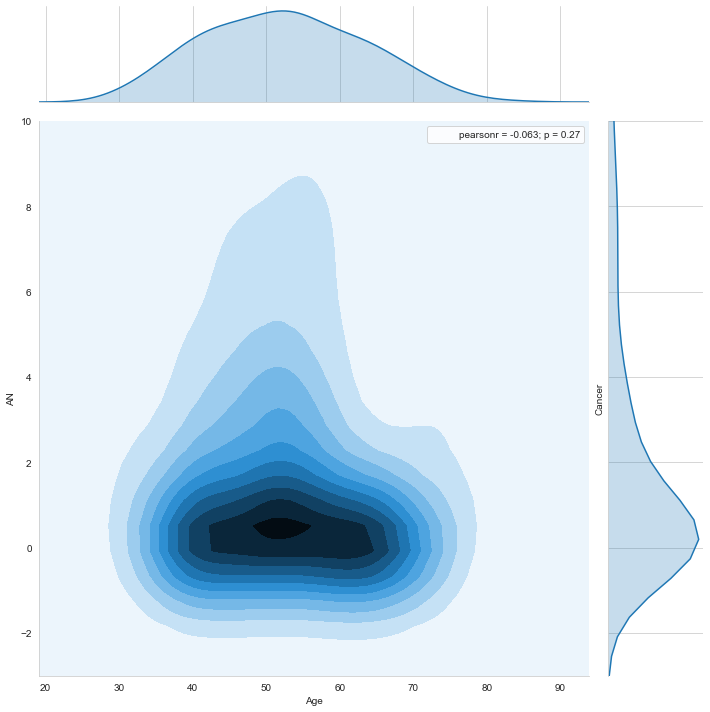

In [17]:
#Kernel Density Estimation
import scipy.stats as stats
j=sns.jointplot(data=df, x="Age",y="AN", kind="kde",height=10)
j.annotate(stats.pearsonr)
plt.ylim(-3,10)
plt.ylabel("Cancer")
plt.show()

Conclusion :<br>
1 Negative pearson correlation coefficient shows strong negative relationship.<br>
2 We cannot assume that that our evidence of the relationship between the variables is very strong as p value is large.

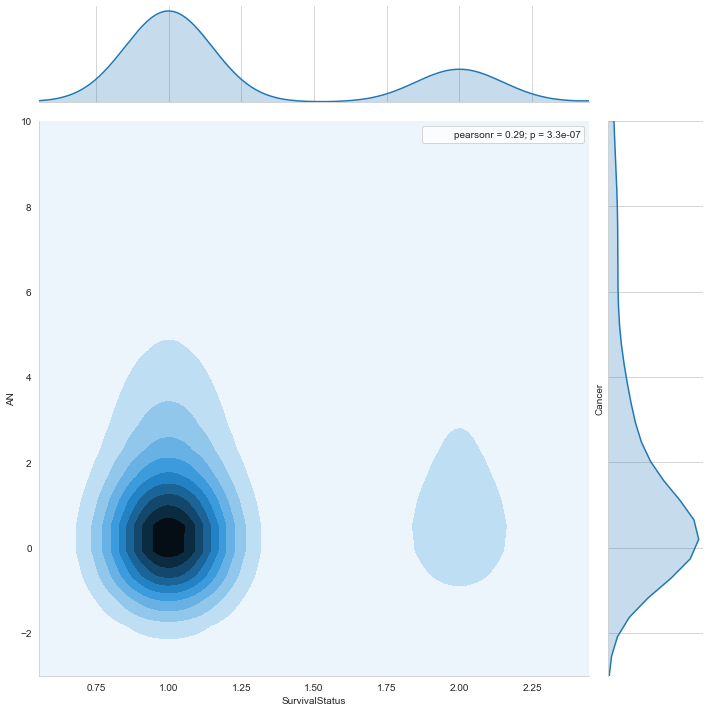

In [18]:
k=sns.jointplot(data=df, x="SurvivalStatus",y="AN", kind="kde",height=10)
k.annotate(stats.pearsonr)
plt.ylim(-3,10)
plt.ylabel("Cancer")
plt.show()

Conclusion :<br>
1 Positive pearson correlation coefficient shows positive relationship.<br>
2 We can assume that that our evidence of the relationship between the variables is very strong as p value is very small.

<h1>Feature Selection</h1>

In [19]:
feature_df=df[['AN','Age']]
X=np.asarray(feature_df)
X[:5]

array([[ 1, 30],
       [ 3, 30],
       [ 0, 30],
       [ 2, 31],
       [ 4, 31]], dtype=int64)

In [20]:
df['SurvivalStatus'] = df['SurvivalStatus'].astype('int')
y = np.asarray(df['SurvivalStatus'])
y [0:15]

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1])

<h1>Splitting Data</h1>

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (244, 2) (244,)
Test set: (62, 2) (62,)


<h1>SVM MODEL</h1>

In [22]:
from sklearn import svm
clf= svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

C:\Users\91873\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 2, 1])

<h1>F1 Score & Jaccard Similarity Score for RBF</h1>

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat))

Avg F1-score: 0.7316
Jaccard score: 0.7903


C:\Users\91873\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


<h1>F1 Score & Jaccard Similarity Score for LINEAR</h1>

In [25]:
clf2=svm.SVC(kernel='linear')
clf2.fit(X_train,y_train)
yhat2=clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

Avg F1-score: 0.6320
Jaccard score: 0.7419


C:\Users\91873\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91873\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


<h1>F1 Score & Jaccard Similarity Score for POLYNOMIAL</h1>

In [26]:
clf3=svm.SVC(kernel='poly')
clf3.fit(X_train,y_train)
yhat3=clf3.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat3))

C:\Users\91873\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Avg F1-score: 0.7456
Jaccard score: 0.7742


C:\Users\91873\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


<h1>F1 Score & Jaccard Similarity Score for SIGMOID</h1>

In [27]:
clf4=svm.SVC(kernel='sigmoid')
clf4.fit(X_train,y_train)
yhat4=clf4.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat4))

Avg F1-score: 0.6320
Jaccard score: 0.7419


C:\Users\91873\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\91873\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\91873\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


<h2 align="center">ANALYSIS OF KERNEL FUNCTIONS</h2>
    <table>
        <tr>
            <th>KERNEL FUNCTION</th>
            <th>F1 SCORE</th>
            <th>JACCARD SCORE</th>
        </tr>
        <tr>
            <td>RBF</td>
            <td>0.7316</td>
            <td>0.7903</td>
        </tr>
        <tr>
            <td>LINEAR</td>
            <td>0.6320</td>
            <td>0.7419</td>
        </tr>
        <tr>
            <td>PLOYNOMIAL</td>
            <td>0.7456</td>
            <td>0.7742</td>
        </tr>
        <tr>
            <td>SIGMOID</td>
            <td>0.6320</td>
            <td>0.7419</td>
        </tr>
    </table>

<h1>CONFUSION MATRIX</h1>
<p>As we can see from Kernel function analysis that RBF is the best suited Kernel function so we build confusion matrix based on RBF.</p> 

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       0.78      1.00      0.88        46
           2       1.00      0.19      0.32        16

    accuracy                           0.79        62
   macro avg       0.89      0.59      0.60        62
weighted avg       0.84      0.79      0.73        62

[[46  0]
 [13  3]]


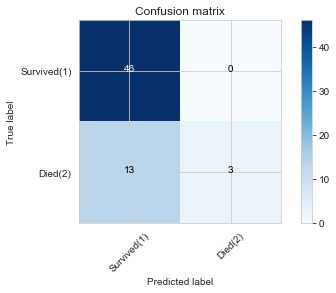

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survived(1)','Died(2)'],normalize= False,  title='Confusion matrix')

In [34]:
#extracting true_positives, false_positives, true_negatives, false_negatives
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, yhat).ravel()
print("True Negatives: ",true_negatives)
print("False Positives: ",false_positives)
print("False Negatives: ",false_negatives)
print("True Positives: ",true_positives)

True Negatives:  46
False Positives:  0
False Negatives:  13
True Positives:  3


In [35]:
#Accuracy
Accuracy = (true_negatives+true_positives)*100/(true_positives+true_negatives+false_positives+false_negatives) 
print("Accuracy :",round(Accuracy,2),"%")

Accuracy : 79.03 %


<h1>Overall Conclusion :<br></h1> 
1 It is very difficult to predict the survival of the patients who had undergone surgery for breast cancer on the basis of these 3 features (i.e. Age, Operation_Year and axil_nodes) because both the classes (i.e. 1 and 2) are almost 85%-90% overlapping with each other.<br><br>
2 These two classes are linearly inseparable due to intense overlapping.<br><br>
3 We should collect more useful features which are helpful in predicting the survival of the patients who had undergone the surgery for breast cancer.<br><br>
4 We need to use non-linear models then only we can predict survival of the patients.<br><br>
5 Axil_nodes are around 20% more useful feature than Age and Operation_Year.<br><br>
6 Order of usefulness of features --> ( axil_nodes > Operation_Year > Age ).